In [60]:
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08
aarts,0,0,0,0,0,0,1,0
ab,0,0,0,0,1,0,0,0
abigail,1,0,0,0,0,0,0,0
abisyńskaco,0,0,0,1,0,0,0,0
abisyńskie,0,0,0,1,0,0,0,0


In [61]:
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(2)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'2020-01': [('nie', 397), ('polecany', 228)],
 '2020-02': [('nie', 251), ('polecany', 188)],
 '2020-03': [('nie', 486), ('polecany', 327)],
 '2020-04': [('nie', 640), ('osób', 319)],
 '2020-05': [('nie', 541), ('artykuł', 192)],
 '2020-06': [('nie', 690), ('super', 264)],
 '2020-07': [('nie', 1288), ('polecany', 542)],
 '2020-08': [('nie', 470), ('polecany', 212)]}

In [62]:
for date, top_words in top_dict.items():
    print(date)
    print(', '.join([word for word, count in top_words[0:10]]))
    print('---')

2020-01
nie, polecany
---
2020-02
nie, polecany
---
2020-03
nie, polecany
---
2020-04
nie, osób
---
2020-05
nie, artykuł
---
2020-06
nie, super
---
2020-07
nie, polecany
---
2020-08
nie, polecany
---


In [63]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
words

['nie',
 'polecany',
 'nie',
 'polecany',
 'nie',
 'polecany',
 'nie',
 'osób',
 'nie',
 'artykuł',
 'nie',
 'super',
 'nie',
 'polecany',
 'nie',
 'polecany']

In [64]:
Counter(words).most_common()

[('nie', 8), ('polecany', 5), ('osób', 1), ('artykuł', 1), ('super', 1)]

In [65]:
add_stop_words = [word for word, count in Counter(words).most_common() if count > 1]
add_stop_words

['nie', 'polecany']

In [66]:
stop_words = frozenset(["a", "aby", "adblock","ale", "artykuł" "aż",
                        "bo", "by",
                        "co", "czy",
                        "do", "dla",
                        "gdy", "gdyż", "gdzie",
                        "i", "ich", "im",
                        "jak", "jakże", "jest", "jeśli", "jeżeli",
                        "kto", "ktoś", "która", "które","który",
                        "lub",
                        "ma", "mam", "może",
                        "na", "nad",
                        "o", "od", "oraz",
                        "pod", "polecany artykuł", "przez", "przy",
                        "są", "się",
                        "to", "tym",
                        "u",
                        "w",
                        "z", "że", "żeby"])

In [67]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = stop_words.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

/home/adsum/.local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['artykuł'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [68]:
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

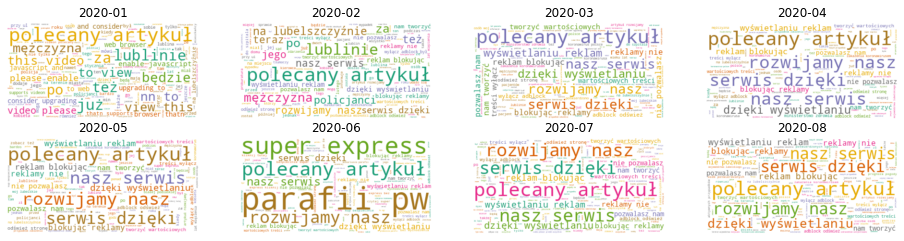

In [69]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ["2020-01", "2020-02", "2020-03", "2020-04", "2020-05", "2020-06", "2020-07", "2020-08"]

# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()